# Random Forest

## Importing Libraries and the Dataset 

In [1]:
import pandas as pd
import numpy as np
import random
import statistics
import itertools
from collections import Counter

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.inspection import plot_partial_dependence

In [2]:
df = pd.read_csv("Cleaned and Prepared Dataset (RF Input).csv")
#df_clusters = pd.read_csv("C:/Users/vubanc/OneDrive - University of Arkansas/Research/LCT/Journal/Data/Datasets/Cleaned and Prepared Dataset (RF Input).csv")

In [3]:
print(df.shape)
df.head()

(19825, 33)


,HOUSEID,TDTRPNUM,VEHID,PERSONID,HOMEOWN,HHSIZE,HHFAMINC,DRVRCNT,WRKCOUNT,YOUNGCHILD,...,STRTTIME_CAT,TRIPPURP_CAT,WHYTO_CAT,DWELTIME_CAT,TRPMILES_CAT,NUMONTRP_CAT,CLUSTER,GASPRICE,GASPRICE_USD,FUELTYPE_BIN
0,30000775,1,2,2,1,2,2,2,0,0,...,10 AM - 3 PM,Home based trip,Social & recreational,50-150 minutes,2-5 miles,1 passenger,1,220.3,2.203,1
1,30000775,3,1,1,1,2,2,2,0,0,...,3 PM - 7 PM,Home based trip,Errands,1-15 minutes,0-2 miles,1 passenger,3,220.3,2.203,3
2,30000775,3,2,2,1,2,2,2,0,0,...,10 AM - 3 PM,non-home based trip,Shopping & Dining,1-15 minutes,0-2 miles,1 passenger,1,220.3,2.203,1
3,30000775,2,2,2,1,2,2,2,0,0,...,10 AM - 3 PM,non-home based trip,Shopping & Dining,15-50 minutes,2-5 miles,1 passenger,1,220.3,2.203,1
4,30000775,1,1,1,1,2,2,2,0,0,...,6 AM - 10 AM,Home based trip,Social & recreational,50-150 minutes,2-5 miles,1 passenger,2,220.3,2.203,3


In [4]:
df.columns

Index(['HOUSEID', 'TDTRPNUM', 'VEHID', 'PERSONID', 'HOMEOWN', 'HHSIZE',
       'HHFAMINC', 'DRVRCNT', 'WRKCOUNT', 'YOUNGCHILD', 'LIF_CYC_CAT', 'R_AGE',
       'EDUC', 'R_SEX', 'WORKER', 'HTPPOPDN', 'HTEEMPDN', 'HBPPOPDN',
       'OTEEMPDN', 'OBPPOPDN', 'DTEEMPDN', 'DBPPOPDN', 'TDWKND',
       'STRTTIME_CAT', 'TRIPPURP_CAT', 'WHYTO_CAT', 'DWELTIME_CAT',
       'TRPMILES_CAT', 'NUMONTRP_CAT', 'CLUSTER', 'GASPRICE', 'GASPRICE_USD',
       'FUELTYPE_BIN'],
      dtype='object')

## One-hot encoding 

In [5]:
list(df["HOMEOWN"].unique())

[1, 2]

In [6]:
df["HOMEOWN"].replace(2,0, inplace=True)

In [7]:
df["LIF_CYC_CAT_1"] = np.where(df["LIF_CYC_CAT"]==1, 1, 0)
df["LIF_CYC_CAT_2"] = np.where(df["LIF_CYC_CAT"]==2, 1, 0)
df["LIF_CYC_CAT_3"] = np.where(df["LIF_CYC_CAT"]==3, 1, 0)

In [8]:
df["R_SEX"].replace(2,0, inplace=True)

In [9]:
df["CLUSTER_1"] = np.where(df["CLUSTER"]==1, 1, 0)
df["CLUSTER_2"] = np.where(df["CLUSTER"]==2, 1, 0)
df["CLUSTER_3"] = np.where(df["CLUSTER"]==3, 1, 0)
df["CLUSTER_4"] = np.where(df["CLUSTER"]==4, 1, 0)
df["CLUSTER_5"] = np.where(df["CLUSTER"]==5, 1, 0)

In [10]:
#df["FUELTYPE_BIN"].replace(2,1, inplace=True)
df["FUELTYPE_BIN"].replace(3,0, inplace=True)
df = df[df["FUELTYPE_BIN"].isin([0,1])]
df.reset_index(drop=True, inplace=True)

In [11]:
#df1 = df [["HOMEOWN", "WRKCOUNT", "LIF_CYC_CAT_1", "LIF_CYC_CAT_2", "LIF_CYC_CAT_3", "R_AGE", "EDUC", "R_SEX", "HTPPOPDN", "HTEEMPDN", "CLUSTER_1", "CLUSTER_2", "CLUSTER_3", "CLUSTER_4", "CLUSTER_5", "GASPRICE_USD", "FUELTYPE_BIN"]]
#df2 = df [["HOMEOWN", "WRKCOUNT", "R_AGE", "EDUC", "R_SEX", "HTPPOPDN", "HTEEMPDN", "CLUSTER_1", "CLUSTER_2", "CLUSTER_3", "CLUSTER_4", "CLUSTER_5", "GASPRICE", "FUELTYPE_BIN"]]
df = df [["HOMEOWN", "WRKCOUNT", "HHFAMINC", "YOUNGCHILD", "R_AGE", "EDUC", "R_SEX", "HTPPOPDN", "HTEEMPDN", "CLUSTER_1", "CLUSTER_2", "CLUSTER_3", "CLUSTER_4", "CLUSTER_5", "GASPRICE", "FUELTYPE_BIN"]]
#df4 = df [["HOMEOWN", "WRKCOUNT", "R_AGE", "DRVRCNT", "EDUC", "R_SEX", "HTPPOPDN", "HTEEMPDN", "CLUSTER_1", "CLUSTER_2", "CLUSTER_3", "CLUSTER_4", "CLUSTER_5", "GASPRICE", "FUELTYPE_BIN"]]
#df5 = df [["HHSIZE", "HOMEOWN", "WRKCOUNT", "R_AGE", "EDUC", "R_SEX", "HTPPOPDN", "HTEEMPDN", "CLUSTER_1", "CLUSTER_2", "CLUSTER_3", "CLUSTER_4", "CLUSTER_5", "GASPRICE", "FUELTYPE_BIN"]]
#df6 = df [["HOMEOWN", "WRKCOUNT", "DRVRCNT", "R_AGE", "EDUC", "R_SEX", "WORKER", "HTPPOPDN", "HTEEMPDN", "CLUSTER_1", "CLUSTER_2", "CLUSTER_3", "CLUSTER_4", "CLUSTER_5", "GASPRICE", "FUELTYPE_BIN"]]

#df = df [["HOMEOWN", "WRKCOUNT", "LIF_CYC_CAT", "R_AGE_CAT", "EDUC", "R_SEX", "HTPPOPDN", "HTEEMPDN", "CLUSTER", "GASPRICE", "FUELTYPE_BIN"]]

In [12]:
print(df.shape)
df.head()

(19825, 16)


,HOMEOWN,WRKCOUNT,HHFAMINC,YOUNGCHILD,R_AGE,EDUC,R_SEX,HTPPOPDN,HTEEMPDN,CLUSTER_1,CLUSTER_2,CLUSTER_3,CLUSTER_4,CLUSTER_5,GASPRICE,FUELTYPE_BIN
0,1,0,2,0,73,3,1,7.0,3.0,1,0,0,0,0,220.3,1
1,1,0,2,0,68,3,0,7.0,3.0,0,0,1,0,0,220.3,0
2,1,0,2,0,73,3,1,7.0,3.0,1,0,0,0,0,220.3,1
3,1,0,2,0,73,3,1,7.0,3.0,1,0,0,0,0,220.3,1
4,1,0,2,0,68,3,0,7.0,3.0,0,1,0,0,0,220.3,0


## Building a Decision Tree 

In [918]:
class Node():
    
    def __init__(self, left=None, right=None, feature=None, threshold=None, information_gain=None, node_class=None, depth=None):
        self.left = left
        self.right = right
        self.feature = feature
        self.threshold = threshold
        self.information_gain = information_gain
        
        self.node_class = node_class    
        self.depth = depth

In [919]:
class DecisionTree():
    tree_depth = 0
    def __init__(self, min_samples, max_depth, root=None):
        self.root = None
        self.min_samples = min_samples
        self.max_depth = max_depth
        
    def GrowTree(self, data, depth):
        
        if self.CheckMinSamples(data, self.min_samples):
            information_gain = self.GetDecision(data)["information_gain"]
            feature = self.GetDecision(data)["feature"]
            threshold = self.GetDecision(data)["threshold"]
            if information_gain>0:
                left_data = self.Split(data, feature, threshold)["left"]
                right_data = self.Split(data, feature, threshold)["right"]
                left = self.GrowTree(left_data, depth+1)
                right = self.GrowTree(right_data, depth+1)
                return Node(left, right, feature, threshold, information_gain, None, depth)
  
        return self.GetLeafNode(data, depth)
    
    def CheckMinSamples(self, data, min_samples):
        if data.shape[0]>min_samples:
            return True
        else:
            return False
        
    def CheckMaxDepth(self, current_depth, max_depth):
        if current_depth < max_depth:
            return True
        else:
            return False
        
    def GetDecision(self, data):
        features = list(data.columns)
        entropy = self.GetEntropy(data)
        best_feature_index = None
        best_feature = None
        best_threshold = None
        best_information_gain = -np.inf
        
        for feature in features[0:-1]:
            thresholds = list(data[feature].unique())
            for threshold in thresholds:
                temp_information_gain = self.GetInformationGain(data, feature, threshold, "gini")
                if temp_information_gain > best_information_gain:
                    best_feature_index = features.index(feature)
                    best_feature = feature
                    best_threshold = threshold
                    best_information_gain = temp_information_gain
                else:
                    continue
                    
        decision_dict = {"feature": best_feature, "threshold": best_threshold, "information_gain": best_information_gain}
        return decision_dict
    
    def Split(self, data, feature, threshold):
        left_data = data[data[feature]<=threshold]
        right_data = data[data[feature]>threshold]
        split_dict = {"left":left_data, "right":right_data}
        return split_dict
    
    def GetEntropy(self, data):
        class_probabilities = data.iloc[:,-1].value_counts(normalize=True)
        entropy = np.dot(-class_probabilities,np.log2(class_probabilities))
        return entropy
    
    def GetGini(self, data):
        class_probabilities = data.iloc[:,-1].value_counts(normalize=True)
        gini = 1 - np.sum(np.square(class_probabilities))
        return gini
    
    def GetInformationGain(self, data, feature, threshold, gini="gini"):
        if gini=="gini":
            parent_entropy = self.GetGini(data)
        else:
            parent_entropy = self.GetEntropy(data)
        
        left_data = self.Split(data, feature, threshold)["left"]
        proportion_left_data = (left_data.shape[0]/data.shape[0])
        right_data = self.Split(data, feature, threshold)["right"]
        proportion_right_data = right_data.shape[0]/data.shape[0]
        
        if gini=="gini":
            children_entropy = proportion_left_data*self.GetGini(left_data)+proportion_right_data*self.GetGini(right_data)
        else:
            children_entropy = proportion_left_data*self.GetEntropy(left_data)+proportion_right_data*self.GetEntropy(right_data)
        
        information_gain = parent_entropy-children_entropy
        return information_gain
    
    def GetLeafNode(self, data, depth):
        class_sizes = dict(data.iloc[:,-1].value_counts(ascending=False))
        node_class = list(class_sizes.keys())[0]
        leaf_node = Node(node_class=node_class, depth=depth)
        return leaf_node
        
    def PrintTree(self, node):
        if node.node_class!=None:
            #return node.node_class
            print("Level", node.depth, "Leaf Node: ", node.node_class)
        else:
            print("Level", node.depth, "Decision Node: ", node.feature, "<=", node.threshold)
            self.PrintTree(node.left)
            self.PrintTree(node.right)

    def fit(self, data):
        self.root = self.GrowTree(data, 1)
        
    def Predict(self, data, node):
        predictions = []
        for i in range(len(data)):
            predictions.append(self.GetPrediction(data.iloc[i,0:-1], node))
        predictions = pd.DataFrame(predictions, columns=[data.columns[-1]])
        return predictions
        
    def GetPrediction(self, X, node):
        if node.node_class != None:
            return node.node_class
        feature_value = X[node.feature]
        if feature_value<=node.threshold:
            return self.GetPrediction(X, node.left)
        elif feature_value>node.threshold:
            return self.GetPrediction(X, node.right)

In [42]:
class DecisionTree():
    tree_depth = 0
    def __init__(self, min_samples, max_depth, nominals=["None"], root=None):
        self.root = None
        self.min_samples = min_samples
        self.max_depth = max_depth
        self.nominals = nominals
        
    def GrowTree(self, data, depth, nominals):
        
        if self.CheckMinSamples(data, self.min_samples):
            information_gain = self.GetDecision(data, nominals)["information_gain"]
            feature = self.GetDecision(data, nominals)["feature"]
            threshold = self.GetDecision(data, nominals)["threshold"]
            if information_gain>0:
                left_data = self.Split(data, feature, threshold, nominals)["left"]
                right_data = self.Split(data, feature, threshold, nominals)["right"]
                left = self.GrowTree(left_data, depth+1, nominals)
                right = self.GrowTree(right_data, depth+1, nominals)
                return Node(left, right, feature, threshold, information_gain, None, depth)
  
        return self.GetLeafNode(data, depth)
    
    def CheckMinSamples(self, data, min_samples):
        if data.shape[0]>min_samples:
            return True
        else:
            return False
        
    def CheckMaxDepth(self, current_depth, max_depth):
        if current_depth < max_depth:
            return True
        else:
            return False
        
    def GetDecision(self, data, nominals):
        features = list(data.columns)
        entropy = self.GetEntropy(data)
        best_feature_index = None
        best_feature = None
        best_threshold = None
        best_information_gain = -np.inf
        
        for feature in features[0:-1]:
            if feature in nominals:
                partitions = self.GetNominalPartitions(data, feature)
                for partition in partitions:
                    #Here partition needs to be passed instead of threshold
                    temp_information_gain = self.GetInformationGain(data, feature, partition, nominals, "gini") 
                    if temp_information_gain > best_information_gain:
                        best_feature_index = features.index(feature)
                        best_feature = feature
                        best_threshold = partition
                        best_information_gain = temp_information_gain
                    else:
                        continue
            else:
                thresholds = list(data[feature].unique())

                for threshold in thresholds:
                    temp_information_gain = self.GetInformationGain(data, feature, threshold, nominals, "gini")
                    if temp_information_gain > best_information_gain:
                        best_feature_index = features.index(feature)
                        best_feature = feature
                        best_threshold = threshold
                        best_information_gain = temp_information_gain
                    else:
                        continue
                    
        decision_dict = {"feature": best_feature, "threshold": best_threshold, "information_gain": best_information_gain}
        return decision_dict
    
    def GetNominalPartitions(self, data, feature):
        categories = list(data[feature].unique().astype(int))
        unique_partitions = []
        for i in range(1,(len(categories)//2)+1):
            for subset in itertools.combinations(categories, i):
                subset = tuple(subset)
                inverseSubset = tuple(x for x in categories if x not in subset)
                if subset not in unique_partitions and inverseSubset not in unique_partitions:
                    unique_partitions.append([list(subset)])
                    unique_partitions[-1].append(list(inverseSubset))
        
        return unique_partitions
        
    
    def Split(self, data, feature, threshold, nominals):
        if feature in nominals:
            left_data = data[data[feature].isin(threshold[0])] 
            right_data = data[data[feature].isin(threshold[1])]
            split_dict = {"left":left_data, "right":right_data}
            return split_dict
        else:
            left_data = data[data[feature]<=threshold]
            right_data = data[data[feature]>threshold]
            split_dict = {"left":left_data, "right":right_data}
            return split_dict
    
    def GetEntropy(self, data):
        class_probabilities = data.iloc[:,-1].value_counts(normalize=True)
        entropy = np.dot(-class_probabilities,np.log2(class_probabilities))
        return entropy
    
    def GetGini(self, data):
        class_probabilities = data.iloc[:,-1].value_counts(normalize=True)
        gini = 1 - np.sum(np.square(class_probabilities))
        return gini
    
    def GetInformationGain(self, data, feature, threshold, nominals, loss):
        if loss=="gini":
            parent_entropy = self.GetGini(data)
        elif loss=="entropy":
            parent_entropy = self.GetEntropy(data)
            
        if feature in nominals:
            left_data = self.Split(data, feature, threshold, nominals)["left"]
            proportion_left_data = (left_data.shape[0]/data.shape[0])
            right_data = self.Split(data, feature, threshold, nominals)["right"]
            proportion_right_data = right_data.shape[0]/data.shape[0]
        else:
            left_data = self.Split(data, feature, threshold, nominals)["left"]
            proportion_left_data = (left_data.shape[0]/data.shape[0])
            right_data = self.Split(data, feature, threshold, nominals)["right"]
            proportion_right_data = right_data.shape[0]/data.shape[0]
        
        if loss=="gini":
            children_entropy = proportion_left_data*self.GetGini(left_data)+proportion_right_data*self.GetGini(right_data)
        elif loss=="entropy":
            children_entropy = proportion_left_data*self.GetEntropy(left_data)+proportion_right_data*self.GetEntropy(right_data)
        
        information_gain = parent_entropy-children_entropy
        return information_gain
    
    def GetLeafNode(self, data, depth):
        class_sizes = dict(data.iloc[:,-1].value_counts(ascending=False))
        node_class = list(class_sizes.keys())[0]
        leaf_node = Node(node_class=node_class, depth=depth)
        return leaf_node
        
    def PrintTree(self, node):
        if node.node_class!=None:
            #return node.node_class
            print("Level", node.depth, "Leaf Node: ", node.node_class)
        else:
            print("Level", node.depth, "Decision Node: ", node.feature, "<=", node.threshold)
            self.PrintTree(node.left)
            self.PrintTree(node.right)

    def fit(self, data):
        self.root = self.GrowTree(data, 1, self.nominals)
        
    def Predict(self, data, node):
        predictions = []
        for i in range(len(data)):
            predictions.append(self.GetPrediction(data.iloc[i,0:-1], node, nominals=self.nominals))
        predictions = pd.DataFrame(predictions, columns=[data.columns[-1]])
        return predictions
        
    def GetPrediction(self, X, node, nominals):
        if node.node_class != None:
            return node.node_class
        feature_value = X[node.feature]
        threshold = node.threshold
        if node.feature in nominals:
            if feature_value in threshold[0]:
                return self.GetPrediction(X, node.left, nominals)
            elif feature_value in threshold[1]:
                return self.GetPrediction(X, node.right, nominals)
        else:
            if feature_value<=node.threshold:
                return self.GetPrediction(X, node.left, nominals)
            elif feature_value>node.threshold:
                return self.GetPrediction(X, node.right, nominals)

## Building the Random Forest

In [81]:
class RandomForest():
    def __init__(self, number_of_trees, number_of_features, forest=None):
        self.number_of_trees = number_of_trees
        self.number_of_features = number_of_features
        self.forest = forest
    
    def GrowForest(self, data):
        forest = []
        for i in range(self.number_of_trees + 1):
            tree = DecisionTree(2, 15) #Randomize the depth and see if it increases accuracy
            features = self.SelectFeatures(data)
            dataset = self.Bootstrap(data)[features]
            tree.fit(dataset)
            forest.append(tree)
        self.forest = forest
            
    def Predict(self, data):
        predictions_list = []
        for tree in self.forest:
            predictions = tree.Predict(data, tree.root)
            predictions = predictions.iloc[:,-1].to_list()
            predictions_list.append(predictions)
            
        predictions_list = np.swapaxes(predictions_list, 0, 1)
        final_predictions = []
        for prediction_list in predictions_list:
            unique_labels = list(set(prediction_list))
            
            if self.CheckTie(unique_labels)[0]==True:
                random_prediction = random.choice(self.CheckTie(unique_labels)[1])
                final_predictions.append(random_prediction)
            else:
                final_predictions.append(self.CheckTie(unique_labels)[1][0])
                
        return final_predictions
    
    def CheckTie(self, lst):
        counter = Counter(lst)
        max_count = max(counter.values())
        number_of_max_elements = sum(1 for count in counter if count==max_count)
        max_elements = [element for element in counter.keys() if counter[element]==max_count]
        
        if number_of_max_elements>1:
            return True, max_elements
        else:
            return False, max_elements
            
    def Bootstrap(self, data):
        indices = list(data.index)
        bootstrapped_indices = random.choices(indices, k=len(indices))
        bootstrapped_data = pd.DataFrame(data.iloc[bootstrapped_indices,:])
        return bootstrapped_data
    
    def SelectFeatures(self, data):
        feature_list = list(data.columns)[:-1]
        random_feature_subset = random.sample(feature_list, self.number_of_features)
        random_feature_subset.append(data.columns[-1])
        return random_feature_subset

## Fitting and Testing the Decision Tree Model

In [13]:
X = df.iloc[:,0:-1]
Y = df[["FUELTYPE_BIN"]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.15, random_state=3)

X = pd.concat([X_train, X_test], axis=0)
Y = pd.concat([Y_train, Y_test], axis=0)

In [14]:
X_train, X_test, Y_train, Y_test  = pd.DataFrame(X_train), pd.DataFrame(X_test), pd.DataFrame(Y_train), pd.DataFrame(Y_test)
X_train.columns = df.columns[0:-1]
X_test.columns = df.columns[0:-1]
Y_train.columns = [df.columns[-1]]
Y_test.columns = [df.columns[-1]]
training_dataset = pd.concat([X_train, Y_train], axis=1)
testing_dataset = pd.concat([X_test, Y_test], axis=1)

In [30]:
Tree = DecisionTree(2, 15)
Tree.fit(training_dataset)

In [31]:
Tree.PrintTree(Tree.root)

Level 1 Decision Node:  WRKCOUNT <= 2.0
Level 2 Decision Node:  EDUC <= 2.0
Level 3 Decision Node:  R_SEX <= 0.0
Level 4 Decision Node:  GASPRICE <= 271.0
Level 5 Decision Node:  GASPRICE <= 235.0
Level 6 Decision Node:  GASPRICE <= 231.39999
Level 7 Decision Node:  HTPPOPDN <= 0.75
Level 8 Decision Node:  GASPRICE <= 211.3
Level 9 Decision Node:  GASPRICE <= 208.8
Level 10 Decision Node:  EDUC <= 1.0
Level 11 Decision Node:  R_AGE_CAT <= 3.0
Level 12 Leaf Node:  0
Level 12 Decision Node:  GASPRICE <= 205.2
Level 13 Leaf Node:  0
Level 13 Leaf Node:  1
Level 11 Leaf Node:  0
Level 10 Leaf Node:  1
Level 9 Decision Node:  GASPRICE <= 219.0
Level 10 Decision Node:  HTPPOPDN <= 0.30000001
Level 11 Decision Node:  HTEEMPDN <= 0.025
Level 12 Decision Node:  GASPRICE <= 213.10001
Level 13 Decision Node:  WRKCOUNT <= 1.0
Level 14 Leaf Node:  1
Level 14 Leaf Node:  0
Level 13 Decision Node:  WRKCOUNT <= 1.0
Level 14 Leaf Node:  0
Level 14 Decision Node:  GASPRICE <= 216.39999
Level 15 Leaf Nod

In [32]:
predictions_overall = Tree.Predict(df, Tree.root)
predictions_train = Tree.Predict(training_dataset, Tree.root)
predictions_test = Tree.Predict(testing_dataset, Tree.root)

print(f"Overall Accuracy: {accuracy_score(Y, predictions_overall)}")
print(f"Train Accuracy: {accuracy_score(Y_train, predictions_train)}")
print(f"Test Accuracy: {accuracy_score(Y_test, predictions_test)}")


Overall Accuracy: 0.9391655583468794
Train Accuracy: 0.9574036511156186
Test Accuracy: 0.8358502954694682


## Fitting and Testing the Random Forest Model 

In [63]:
number_of_trees = [10]

for number in number_of_trees:
    RandomForestClassifier = RandomForest(number, 4)
    RandomForestClassifier.GrowForest(training_dataset)
    print(f"Predicting Classes with a Random Forest of {number} trees")
    predictions = RandomForestClassifier.Predict(df)
    print(f"Overall accuracy of Random Forest Classifer with {number} trees: {accuracy_score(Y, predictions)}")
    #predictions = RandomForestClassifier.Predict(training_dataset)
    #print(f"Testing accuracy of Random Forest Classifer with {number} trees: {accuracy_score(Y_train, predictions)}")
    #predictions = RandomForestClassifier.Predict(testing_dataset)
    #print(f"Testing accuracy of Random Forest Classifer with {number} trees: {accuracy_score(Y_test, predictions)}")

Predicting Classes with a Random Forest of 10 trees
Overall accuracy of Random Forest Classifer with 10 trees: 0.5014531303876656


## Decision Tree (using built-in functions)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
tree = DecisionTreeClassifier(min_samples_split=2)

In [17]:
tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [18]:
path = tree.cost_complexity_pruning_path(X_train, Y_train)
alphas, impurities = path.ccp_alphas, path.impurities

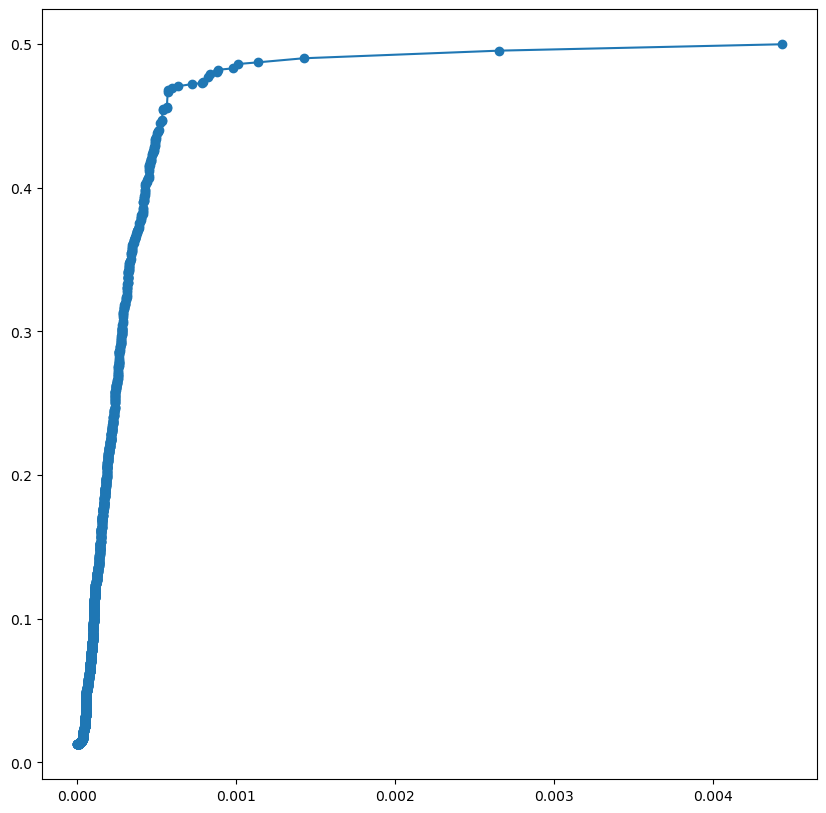

In [19]:
fig, axs = plt.subplots(1,1,figsize=(10,10))
plt.plot(alphas, impurities, marker="o")

In [ ]:
train_accuracies = []
test_accuracies = []

for alpha in alphas:
    tree = DecisionTreeClassifier(min_samples_split=2, ccp_alpha=alpha)
    tree.fit(X_train, Y_train)
    predictions_train = tree.predict(X_train)
    train_accuracies.append(accuracy_score(Y_train, predictions_train))
    predictions_test = tree.predict(X_test)
    test_accuracies.append(accuracy_score(Y_test, predictions_test))

max_test_accuracy = max(test_accuracies)
max_index = test_accuracies.index(max(test_accuracies))

fig, axs = plt.subplots(1,1,figsize=(10,10))
axs = plt.plot(alphas, train_accuracies, color="blue")
axs = plt.plot(alphas, test_accuracies, color="red")

print(f"Maximum test accuracy is at {max_test_accuracy}")
print(f"The corresponding train accuracy is {train_accuracies[max_index]}")

In [20]:
tree = DecisionTreeClassifier(min_samples_split=2, ccp_alpha=0)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0)

In [20]:
predictions_overall = tree.predict(X)
predictions_train = tree.predict(X_train)
predictions_test = tree.predict(X_test)

print(f"Overall Accuracy: {tree.score(X, Y)}")
print(f"Train Accuracy: {tree.score(X_train, Y_train)}")
print(f"Test Accuracy: {tree.score(X_test, Y_test)}")

Overall Accuracy: 0.9718032786885246
Train Accuracy: 0.9895555159931161
Test Accuracy: 0.871217215870881


In [21]:
scores = cross_val_score(tree, X, Y, scoring="accuracy", cv=10)
mean_accuracy = scores.mean()
print(f"Mean accuracy: {mean_accuracy}")

Mean accuracy: 0.8804547279524799


In [33]:
scores

array([0.89107413, 0.87090267, 0.8698941 , 0.8774584 , 0.8809884 ,
       0.87790111, 0.8950555 , 0.87891019, 0.87638749, 0.8814329 ])

In [55]:
feature_importances = {}
for index, column in enumerate(X.columns):
    feature_importances[tree.feature_importances_[index]] = column
pd.DataFrame(sorted(feature_importances.items(), reverse=True))

,0,1
0,0.333362,GASPRICE
1,0.245771,R_AGE
2,0.089095,HTEEMPDN
3,0.075749,HTPPOPDN
4,0.058504,HHFAMINC
5,0.058252,WRKCOUNT
6,0.019769,CLUSTER_5
7,0.018399,CLUSTER_1
8,0.018265,HOMEOWN
9,0.017847,EDUC


C:\Users\vubanc\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


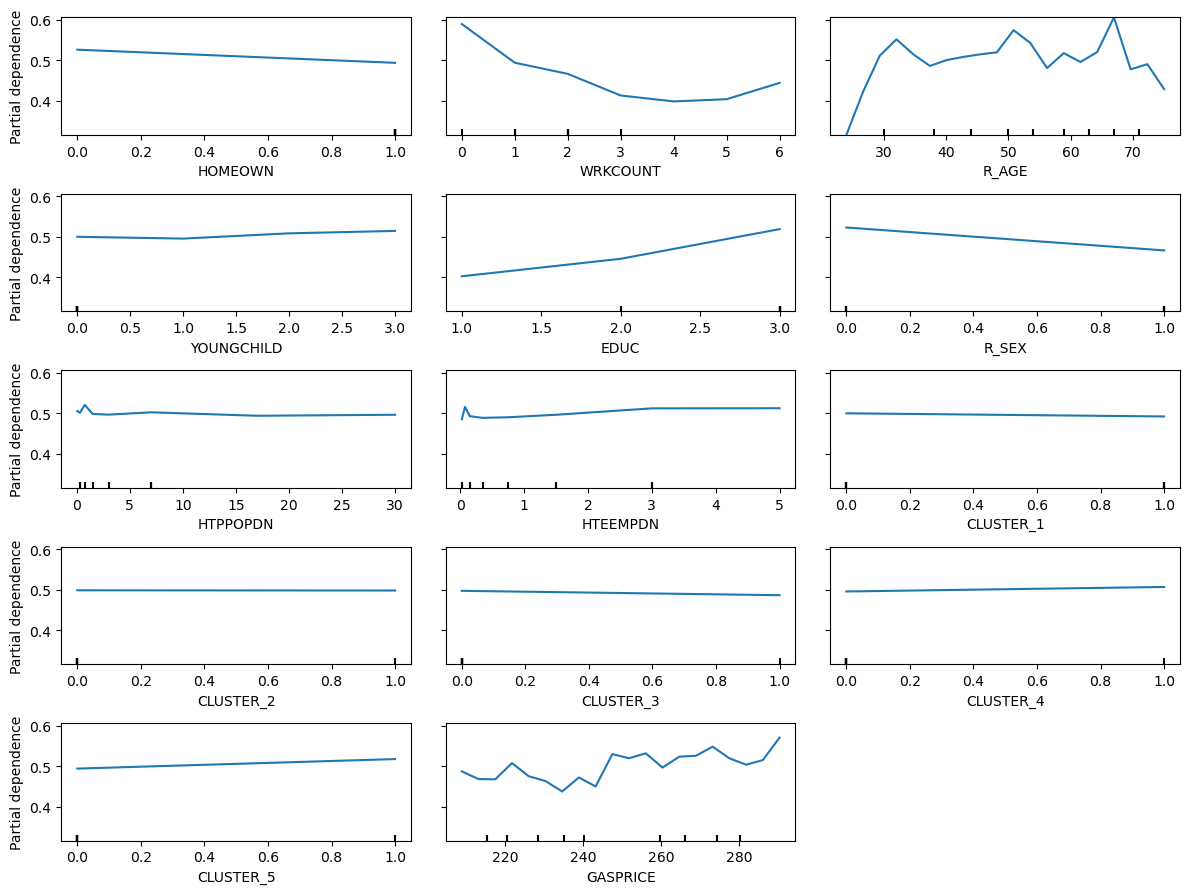

In [86]:
plot_partial_dependence(tree, X, features=list(X.columns), grid_resolution=20)
fig = plt.gcf() #Getcurrent figure
fig.set_size_inches(12,9)
fig.subplots_adjust(wspace=0.1, hspace=0.5)
plt.tight_layout()
plt.show()

In [49]:
pip install PyALE

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [20]:
from PyALE import ale

In [47]:
#This function finds the ALE of each variable individually
#To find the ALE of continuous/ordered categorical variables, the unordered categoricals have to be one-hot encoded
#To find the ALE of unordered categorical variables, they must be passed in non-encoded form along with an encoder function

PyALE._ALE_generic:INFO: Continuous feature detected.


,eff,size,lowerCI_95%,upperCI_95%
GASPRICE,,,,
201.89999,-0.030199,0.0,NaN,NaN
215.20000,-0.020660,1992.0,-0.024932,-0.016388
220.39999,-0.018656,1996.0,-0.020620,-0.016693
228.39999,-0.012018,2109.0,-0.015487,-0.008550
235.00000,-0.010391,1844.0,-0.012232,-0.008550
240.20000,-0.004352,1987.0,-0.007762,-0.000942
259.60001,0.006245,2076.0,0.001837,0.010654
266.00000,0.012001,1911.0,0.008607,0.015396
274.29999,0.021862,2231.0,0.017759,0.025966


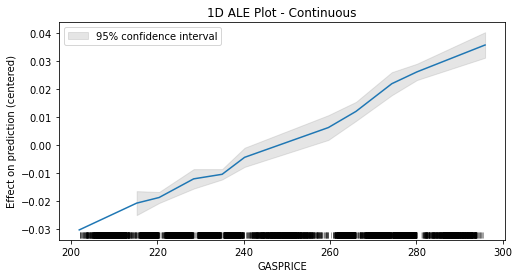

In [25]:
ale(X=X, model=tree, feature = ["GASPRICE"], grid_size=10, include_CI=True)

## Random Forest (using built-in functions)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [44]:
RF = RandomForestClassifier(n_estimators=1000, warm_start=True, oob_score=False, ccp_alpha=0)

In [45]:
RF.fit(X_train, Y_train)

C:\Users\vubanc\AppData\Local\Temp\ipykernel_18064\3529511441.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train, Y_train)


RandomForestClassifier(ccp_alpha=0, n_estimators=1000, warm_start=True)

In [46]:
predictions_overall = RF.predict(X)
predictions_train = RF.predict(X_train)
predictions_test = RF.predict(X_test)

print(f"Overall Accuracy: {RF.score(X, Y)}")
print(f"Train Accuracy: {RF.score(X_train, Y_train)}")
print(f"Test Accuracy: {RF.score(X_test, Y_test)}")

Overall Accuracy: 0.9649936948297604
Train Accuracy: 0.9895555159931161
Test Accuracy: 0.8258238063214526


In [47]:
scores = cross_val_score(RF, X, Y, scoring="accuracy", cv=10)
mean_accuracy = scores.mean()
print(f"Mean accuracy: {mean_accuracy}")

C:\Users\vubanc\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\vubanc\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\vubanc\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\vubanc\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector 

Mean accuracy: 0.8450436429122821


## XGB (using built-in functions)

In [2]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
import xgboost as xgb

In [38]:
XGB = xgb.XGBClassifier(n_estimators=500)

In [39]:
XGB.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [40]:
predictions = XGB.predict(X_test)

In [41]:
predictions_overall = XGB.predict(X)
predictions_train = XGB.predict(X_train)
predictions_test = XGB.predict(X_test)

print(f"Overall Accuracy: {XGB.score(X, Y)}")
print(f"Train Accuracy: {XGB.score(X_train, Y_train)}")
print(f"Test Accuracy: {XGB.score(X_test, Y_test)}")

Overall Accuracy: 0.9559142496847415
Train Accuracy: 0.9724645421636698
Test Accuracy: 0.8621385339609953


In [42]:
scores = cross_val_score(XGB, X, Y, scoring="accuracy", cv=10)
mean_accuracy = scores.mean()
print(f"Mean accuracy: {mean_accuracy}")

Mean accuracy: 0.8710724813793125


## Support Vector Machine (using built-in functions)

In [110]:
from sklearn.svm import SVC

In [111]:
SVMclassifer = SVC(kernel="linear")

In [112]:
SVMclassifer.fit(X_train, Y_train)

C:\Users\vubanc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [113]:
predictions = SVMclassifer.predict(X_test)

In [114]:
predictions_overall = SVMclassifier.predict(X)
predictions_train = SVMclassifier.predict(X_train)
predictions_test = SVMclassifier.predict(X_test)

print(f"Overall Accuracy: {accuracy_score(predictions_overall, Y)}")
print(f"Train Accuracy: {accuracy_score(predictions_train, Y_train)}")
print(f"Test Accuracy: {accuracy_score(predictions_test, Y_test)}")

NameError: name 'SVMclassifier' is not defined

## Naive Bayes (using built-in functions)

In [55]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

In [435]:
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train, Y_train)

C:\Users\vubanc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB(binarize=True)

In [436]:
predictions = BernNB.predict(X_test)

In [437]:
accuracy_score(Y_test, predictions)

0.5288903479973736

In [70]:
GaussNB = GaussianNB()
GaussNB.fit(X_train, Y_train)

C:\Users\vubanc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [71]:
predictions = GaussNB.predict(X_test)

In [72]:
predictions_overall = GaussNB.predict(X)
predictions_train = GaussNB.predict(X_train)
predictions_test = GaussNB.predict(X_test)

print(f"Overall Accuracy: {accuracy_score(predictions_overall, Y)}")
print(f"Train Accuracy: {accuracy_score(predictions_train, Y_train)}")
print(f"Test Accuracy: {accuracy_score(predictions_test, Y_test)}")

Overall Accuracy: 0.5688776796973518
Train Accuracy: 0.56780013055605
Test Accuracy: 0.5749831876260928


## Logistic Regression (using built-in functions)

In [ ]:
df["R_AGE_CAT_1"] = np.where(df["R_AGE_CAT"]==1, 1, 0)
df["R_AGE_CAT_2"] = np.where(df["R_AGE_CAT"]==2, 1, 0)
df["R_AGE_CAT_3"] = np.where(df["R_AGE_CAT"]==3, 1, 0)
df["R_AGE_CAT_4"] = np.where(df["R_AGE_CAT"]==4, 1, 0)

In [46]:
df["EDUC_1"] = np.where(df["EDUC"]==1, 1, 0)
df["EDUC_2"] = np.where(df["EDUC"]==2, 1, 0)
df["EDUC_3"] = np.where(df["EDUC"]==3, 1, 0)

In [47]:
df = df[['HOMEOWN', "WRKCOUNT", 'YOUNGCHILD', 'R_AGE', 'HTPPOPDN', 'HTEEMPDN', 'EDUC', 'CLUSTER_1', 'CLUSTER_2', 'CLUSTER_3', 'CLUSTER_4', 'CLUSTER_5', "GASPRICE", 'FUELTYPE_BIN']]

In [48]:
df.columns

Index(['HOMEOWN', 'WRKCOUNT', 'YOUNGCHILD', 'R_AGE', 'HTPPOPDN', 'HTEEMPDN',
       'EDUC_2', 'EDUC_3', 'CLUSTER_1', 'CLUSTER_2', 'CLUSTER_3', 'CLUSTER_4',
       'GASPRICE', 'FUELTYPE_BIN'],
      dtype='object')

In [49]:
X = df.iloc[:, 0:-1].values
Y = df.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.15, random_state=41)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
LR = LogisticRegression(max_iter=1000)

In [50]:
LR.fit(X_train, Y_train)

C:\Users\vubanc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [51]:
predictions = LR.predict(X_test)

In [52]:
predictions_overall = LR.predict(X)
predictions_train = LR.predict(X_train)
predictions_test = LR.predict(X_test)

print(f"Overall Accuracy: {accuracy_score(predictions_overall, Y)}")
print(f"Train Accuracy: {accuracy_score(predictions_train, Y_train)}")
print(f"Test Accuracy: {accuracy_score(predictions_test, Y_test)}")

Overall Accuracy: 0.5765447667087011
Train Accuracy: 0.5761675864933832
Test Accuracy: 0.5786819098856758


In [53]:
scores = cross_val_score(LR, X, Y, scoring="accuracy", cv=10)
mean_accuracy = scores.mean()
print(f"Mean accuracy: {mean_accuracy}")

C:\Users\vubanc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vubanc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vubanc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vubanc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Mean accuracy: 0.5777056035840467


In [139]:
LR.coef_

array([[-0.20864788, -0.19336866, -0.11397301, -0.23089084,  0.00269012,
         0.30182558, -0.27740726, -0.00054457,  0.02729613, -0.14421186,
        -0.09022204, -0.13363714,  0.06114476,  0.18450501,  0.00046657]])